In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})
%matplotlib widget 

In [2]:
# define an array of temeprature points from 4 K to 298 K in increments of 3
temperature = np.linspace(4,298, 99, int)


In [3]:
# prints temperature points for interpolation function
print(temperature)

[  4.   7.  10.  13.  16.  19.  22.  25.  28.  31.  34.  37.  40.  43.
  46.  49.  52.  55.  58.  61.  64.  67.  70.  73.  76.  79.  82.  85.
  88.  91.  94.  97. 100. 103. 106. 109. 112. 115. 118. 121. 124. 127.
 130. 133. 136. 139. 142. 145. 148. 151. 154. 157. 160. 163. 166. 169.
 172. 175. 178. 181. 184. 187. 190. 193. 196. 199. 202. 205. 208. 211.
 214. 217. 220. 223. 226. 229. 232. 235. 238. 241. 244. 247. 250. 253.
 256. 259. 262. 265. 268. 271. 274. 277. 280. 283. 286. 289. 292. 295.
 298.]


In [4]:
# actual values inputted into lists
actual_bond_length = [2.5043, 2.5036, 2.5013, 2.4978, 2.5027, 2.503, 2.519]
actual_temperature = [4, 38, 79, 121, 165, 202.5, 298]
actual_error_length = [0.0026, 0.0026, 0.0028, 0.0029, 0.0032, 0.004, 0.004]

In [5]:
# interpolation using actual results and errors on defined grid of temperature values
params = [actual_bond_length, actual_error_length]
bond_length = np.interp(temperature, actual_temperature, actual_bond_length)
error_length = np.interp(temperature, actual_temperature, actual_error_length)
upper_err = bond_length + error_length
lower_err = bond_length - error_length

In [6]:
# prints the resuling bond lengths 
print(bond_length)

[2.5043     2.50423824 2.50417647 2.50411471 2.50405294 2.50399118
 2.50392941 2.50386765 2.50380588 2.50374412 2.50368235 2.50362059
 2.5034878  2.50331951 2.50315122 2.50298293 2.50281463 2.50264634
 2.50247805 2.50230976 2.50214146 2.50197317 2.50180488 2.50163659
 2.50146829 2.5013     2.50105    2.5008     2.50055    2.5003
 2.50005    2.4998     2.49955    2.4993     2.49905    2.4988
 2.49855    2.4983     2.49805    2.4978     2.49813409 2.49846818
 2.49880227 2.49913636 2.49947045 2.49980455 2.50013864 2.50047273
 2.50080682 2.50114091 2.501475   2.50180909 2.50214318 2.50247727
 2.502708   2.502732   2.502756   2.50278    2.502804   2.502828
 2.502852   2.502876   2.5029     2.502924   2.502948   2.502972
 2.502996   2.50341885 2.50392147 2.50442408 2.5049267  2.50542932
 2.50593194 2.50643455 2.50693717 2.50743979 2.50794241 2.50844503
 2.50894764 2.50945026 2.50995288 2.5104555  2.51095812 2.51146073
 2.51196335 2.51246597 2.51296859 2.5134712  2.51397382 2.51447644
 2.5149

In [ ]:
# for a smooth line
spl = interpolate.make_smoothing_spline(actual_temperature, actual_bond_length)
grid = np.linspace(actual_temperature[0], actual_temperature[-1], 400)

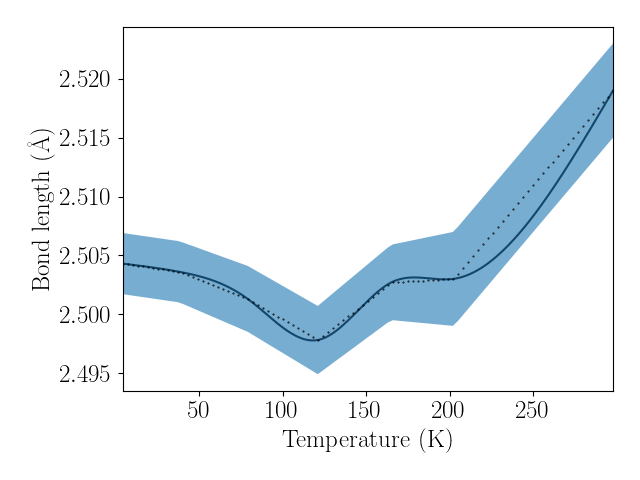

In [48]:
plt.figure()
plt.scatter(temperature, bond_length, s=0.2, c='k',zorder=10)
plt.plot(grid, spl(grid), label='Spline', color='k')
plt.xlabel('Temperature (K)')
plt.ylabel('Bond length (Å)')
plt.fill_between(temperature, upper_err, lower_err, zorder=2, alpha=0.6)
plt.xlim(4, 298)
plt.tight_layout()
plt.show()